In [1]:
import cv2
import sys
import matplotlib.pyplot as plt

import torch
from ultralytics import YOLO

In [2]:
print(torch.__version__)
print(sys.version)
print(sys.executable)
print(torch.backends.cudnn.version())

2.4.0+cu121
3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
d:\PROGRAMMING\AI_HDD\SenierProject\Yolo\.venv\Scripts\python.exe
90100


In [3]:
model = YOLO("../pretrained/yolov8m.pt")
face_cascade = cv2.CascadeClassifier("../haarcascades/haarcascade_frontalcatface_default.xml")

In [9]:
img = cv2.imread("../dataset/test/test1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
results = model(img)

for result in results: 
    boxes = result.boxes 
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  
        confidence = box.conf[0]  
        class_id = int(box.cls[0]) 
        label = model.names[class_id]
        
        
        if label == 'person':
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f'{label} {confidence:.2f}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)



0: 448x640 1 person, 1 car, 1 chair, 72.8ms
Speed: 3.1ms preprocess, 72.8ms inference, 5.0ms postprocess per image at shape (1, 3, 448, 640)


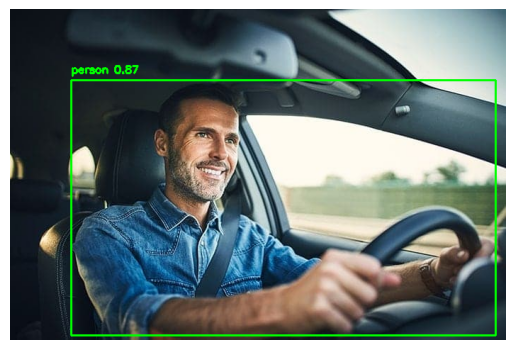

In [14]:
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()